Predicting Mortality for Non-alcoholic Fatty Liver Disease
Kavyalata Kothari
MS Computer Science
CSU Northridge                                                                      

In [257]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.metrics import mean_squared_error,r2_score
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score
from scipy.stats import randint as sp_randint
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split, GridSearchCV
import xgboost as xgb
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

In [258]:
df = pd.read_csv("nafld1.csv")
df.head()

,Unnamed: 0,id,age,male,weight,height,bmi,case.id,futime,status
0,3631,1,57,0,60.0,163.0,22.690939,10630.0,6261,0
1,8458,2,67,0,70.4,168.0,24.884028,14817.0,624,0
2,6298,3,53,1,105.8,186.0,30.453537,3.0,1783,0
3,15398,4,56,1,109.3,170.0,37.830100,6628.0,3143,0
4,13261,5,68,1,NaN,NaN,NaN,1871.0,1836,1


In [259]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17549 entries, 0 to 17548
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  17549 non-null  int64  
 1   id          17549 non-null  int64  
 2   age         17549 non-null  int64  
 3   male        17549 non-null  int64  
 4   weight      12763 non-null  float64
 5   height      14381 non-null  float64
 6   bmi         12588 non-null  float64
 7   case.id     17518 non-null  float64
 8   futime      17549 non-null  int64  
 9   status      17549 non-null  int64  
dtypes: float64(4), int64(6)
memory usage: 1.3 MB


# Exploratory Data Analysis

In [260]:
df.describe()

,Unnamed: 0,id,age,male,weight,height,bmi,case.id,futime,status
count,17549.000000,17549.000000,17549.000000,17549.000000,12763.000000,14381.000000,12588.000000,17518.000000,17549.000000,17549.000000
mean,8780.106046,8784.215967,52.659639,0.467320,86.353350,169.434949,30.073865,8840.924478,2410.600547,0.077725
std,5070.539328,5070.970712,14.722515,0.498945,22.239458,10.141421,7.085435,5051.334075,1573.017638,0.267746
min,1.000000,1.000000,18.000000,0.000000,33.400000,123.000000,9.207332,3.000000,7.000000,0.000000
25%,4389.000000,4393.000000,42.000000,0.000000,70.000000,162.000000,25.136434,4598.000000,1132.000000,0.000000
50%,8778.000000,8786.000000,53.000000,0.000000,83.900000,169.000000,28.875884,8781.000000,2148.000000,0.000000
75%,13171.000000,13175.000000,63.000000,1.000000,99.200000,177.000000,33.710372,13249.000000,3353.000000,0.000000
max,17566.000000,17566.000000,98.000000,1.000000,181.700000,215.000000,84.395725,17563.000000,7268.000000,1.000000


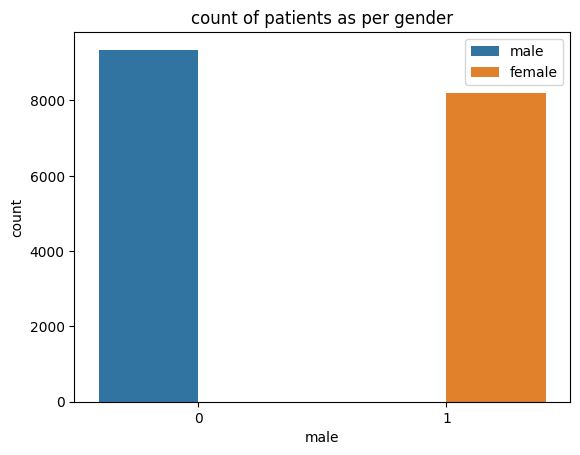

In [261]:
sns.countplot(data = df, x ='male', hue = 'male').set(title='count of patients as per gender')
plt.legend(labels = ['male','female'], bbox_to_anchor=(1, 1))

plt.show()

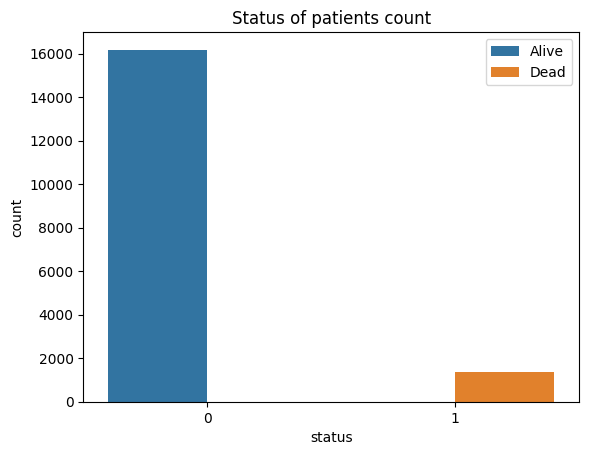

In [262]:
sns.countplot(data = df, x ='status', hue ='status' ).set(title='Status of patients count')
plt.legend(labels=['Alive','Dead'], bbox_to_anchor=(1, 1))

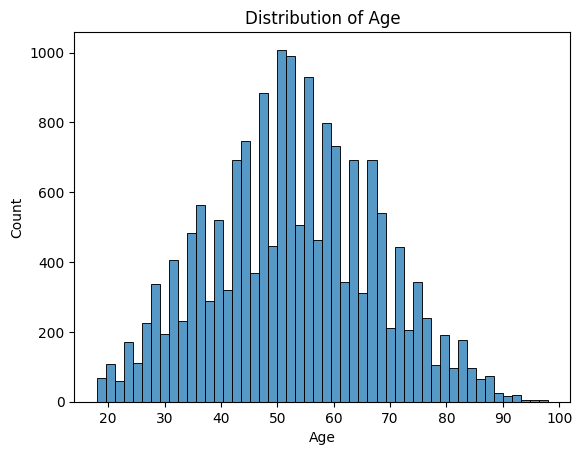

In [263]:
sns.histplot(df['age'])
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Distribution of Age')
plt.show()

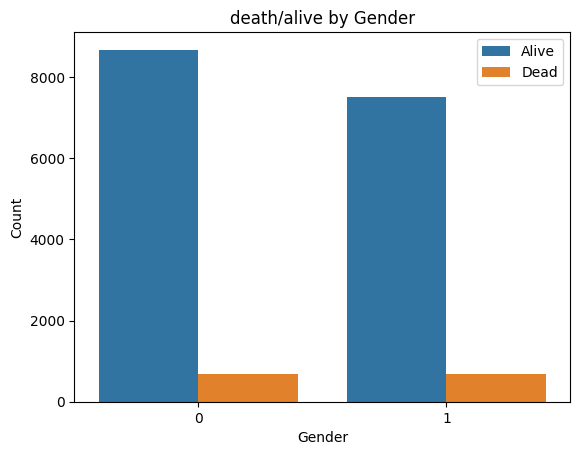

In [264]:
# Create barplot of death rate frequency by gender
sns.countplot(x='male', hue='status', data=df)

# Set the title and axis labels
plt.title('death/alive by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(labels=['Alive','Dead'], bbox_to_anchor=(1, 1))
# Show the plot
plt.show()

In [265]:
import plotly.express as px
fig = px.pie(df, values ="futime", names ="status", title='Status of Patients based on last follow-up', width=400, height=400)
fig.update_traces(textposition='inside')
fig.update_layout(uniformtext_minsize=10, uniformtext_mode='hide')
fig.show()

array([[<Axes: title={'center': 'Unnamed: 0'}>,
        <Axes: title={'center': 'id'}>, <Axes: title={'center': 'age'}>],
       [<Axes: title={'center': 'male'}>,
        <Axes: title={'center': 'weight'}>,
        <Axes: title={'center': 'height'}>],
       [<Axes: title={'center': 'bmi'}>,
        <Axes: title={'center': 'case.id'}>,
        <Axes: title={'center': 'futime'}>],
       [<Axes: title={'center': 'status'}>, <Axes: >, <Axes: >]],
      dtype=object)

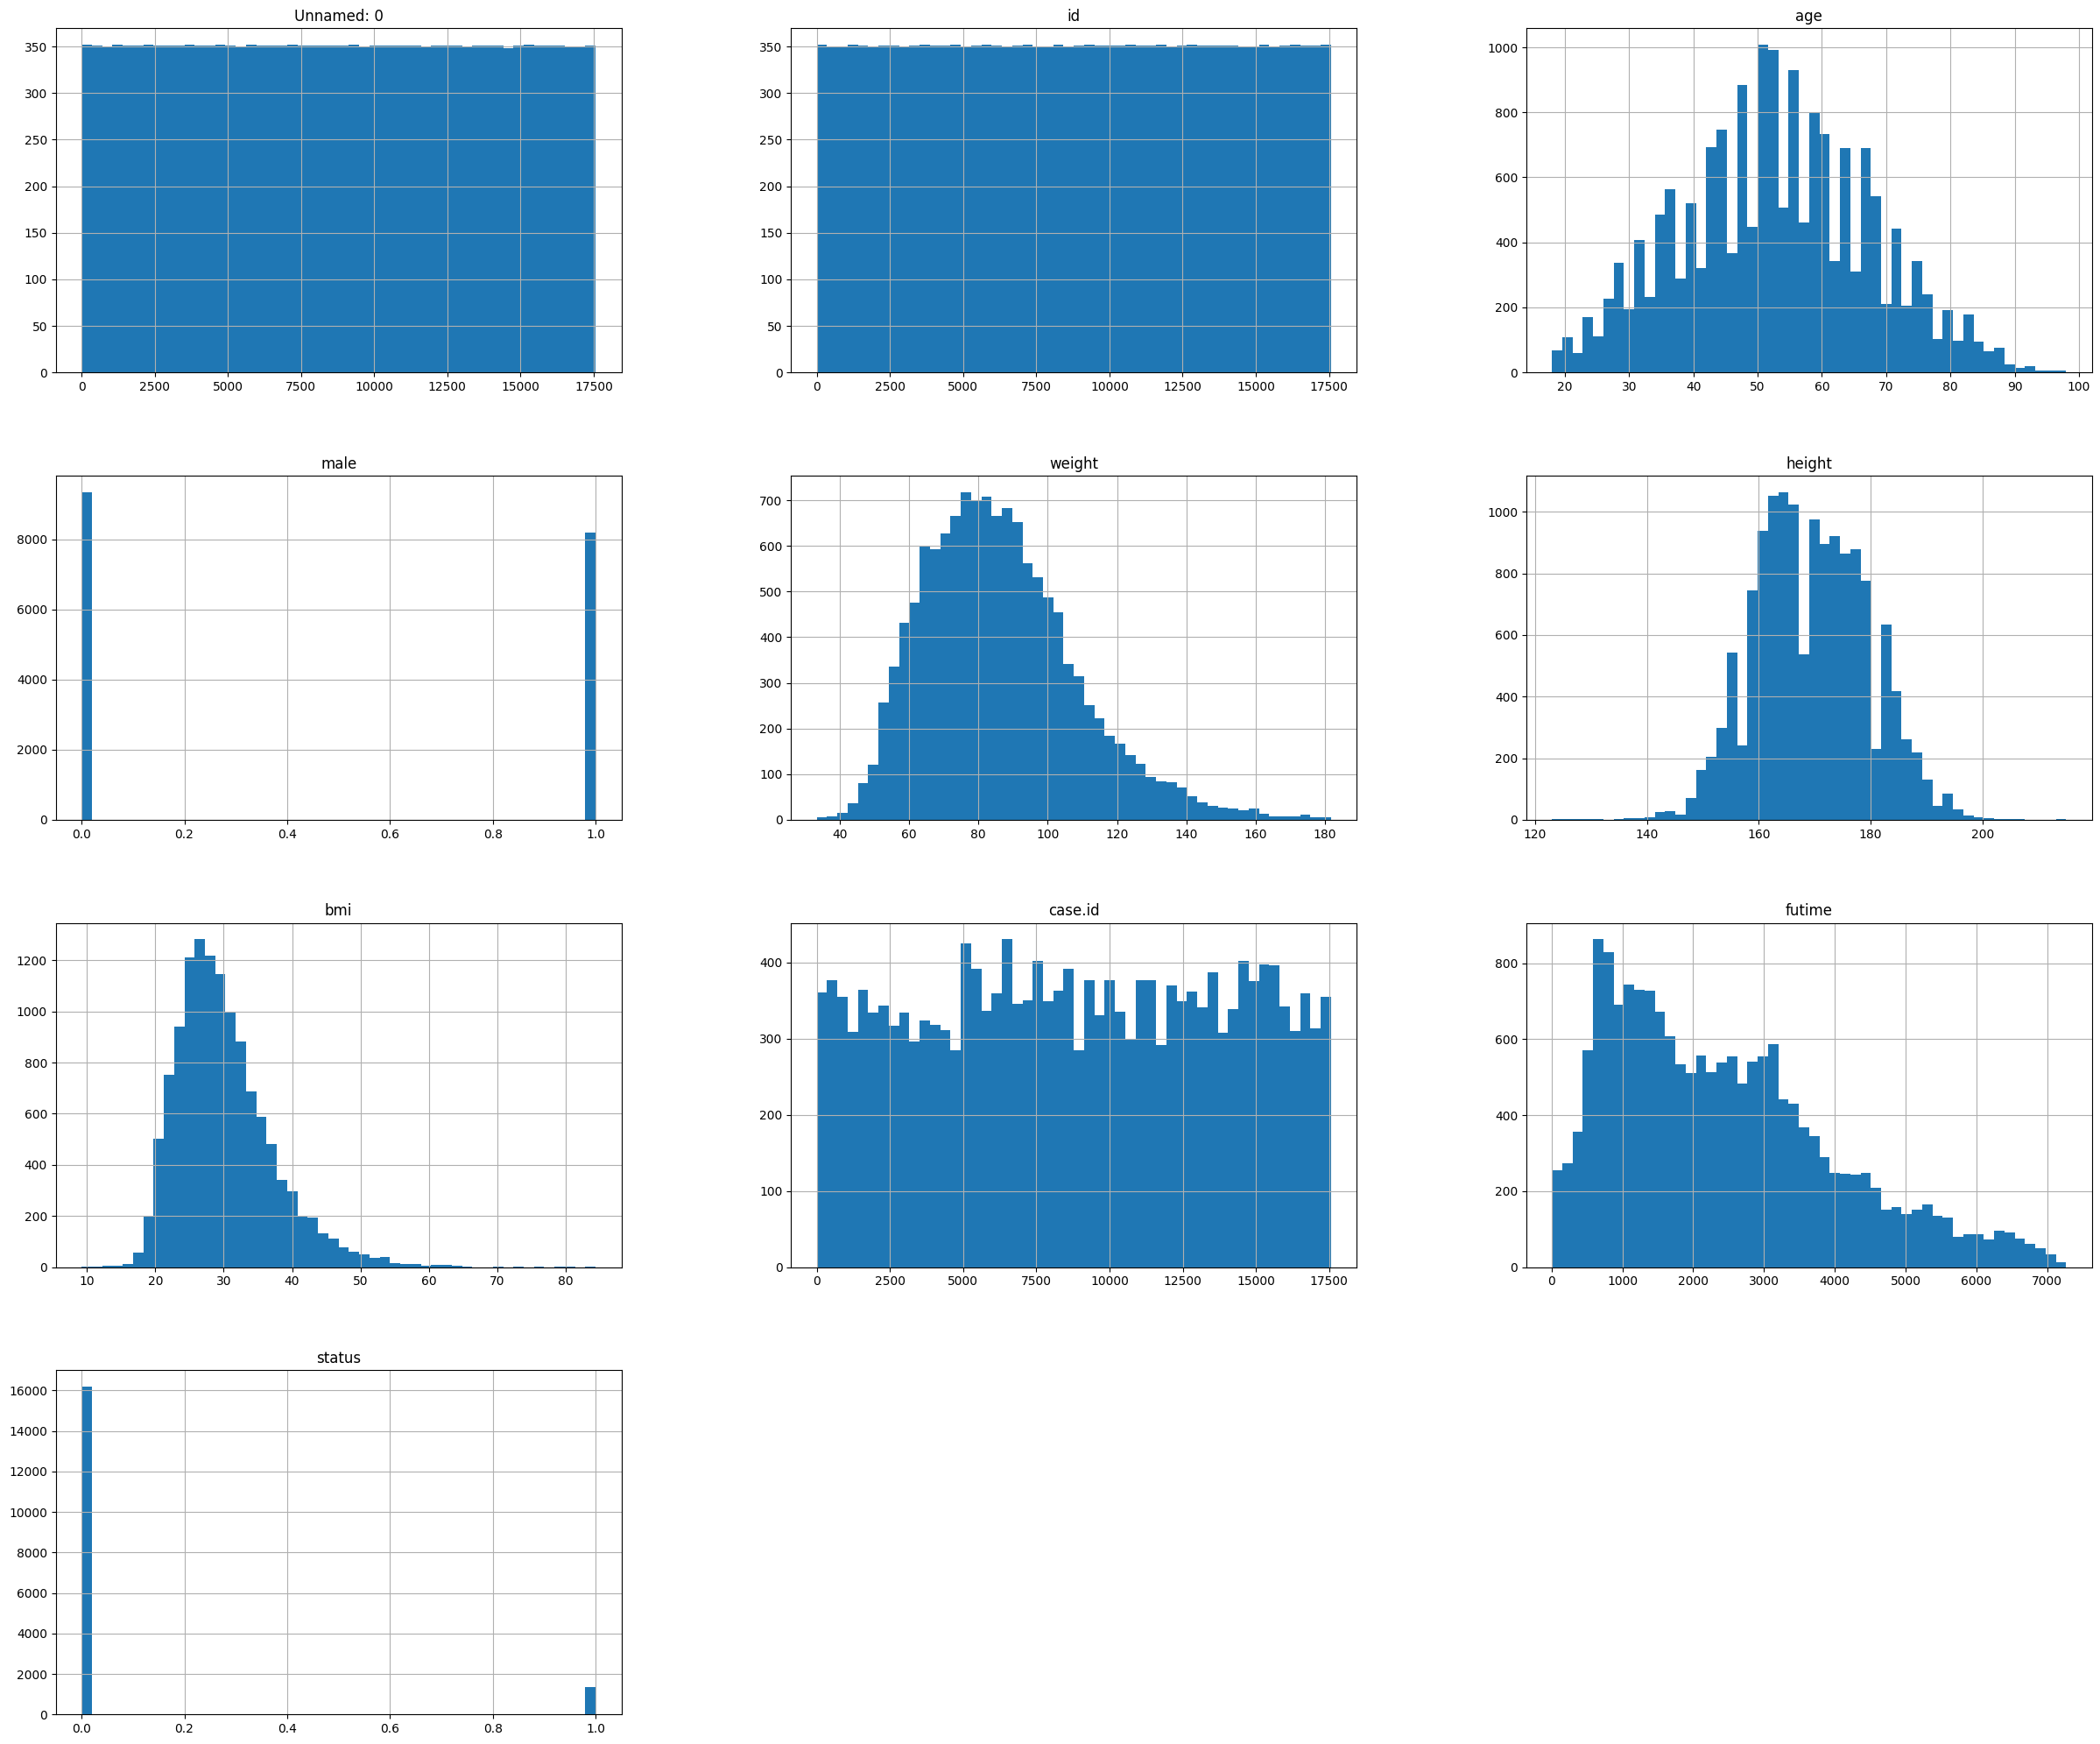

In [266]:
#Histogram to check data distribution
df.hist(bins = 50, figsize = (30,25))

A pairplot is a graphical representation that allows us to visualize the relationships between pairs of variables in a dataset. It provides a matrix of scatterplots, where each scatterplot represents the relationship between two variables.

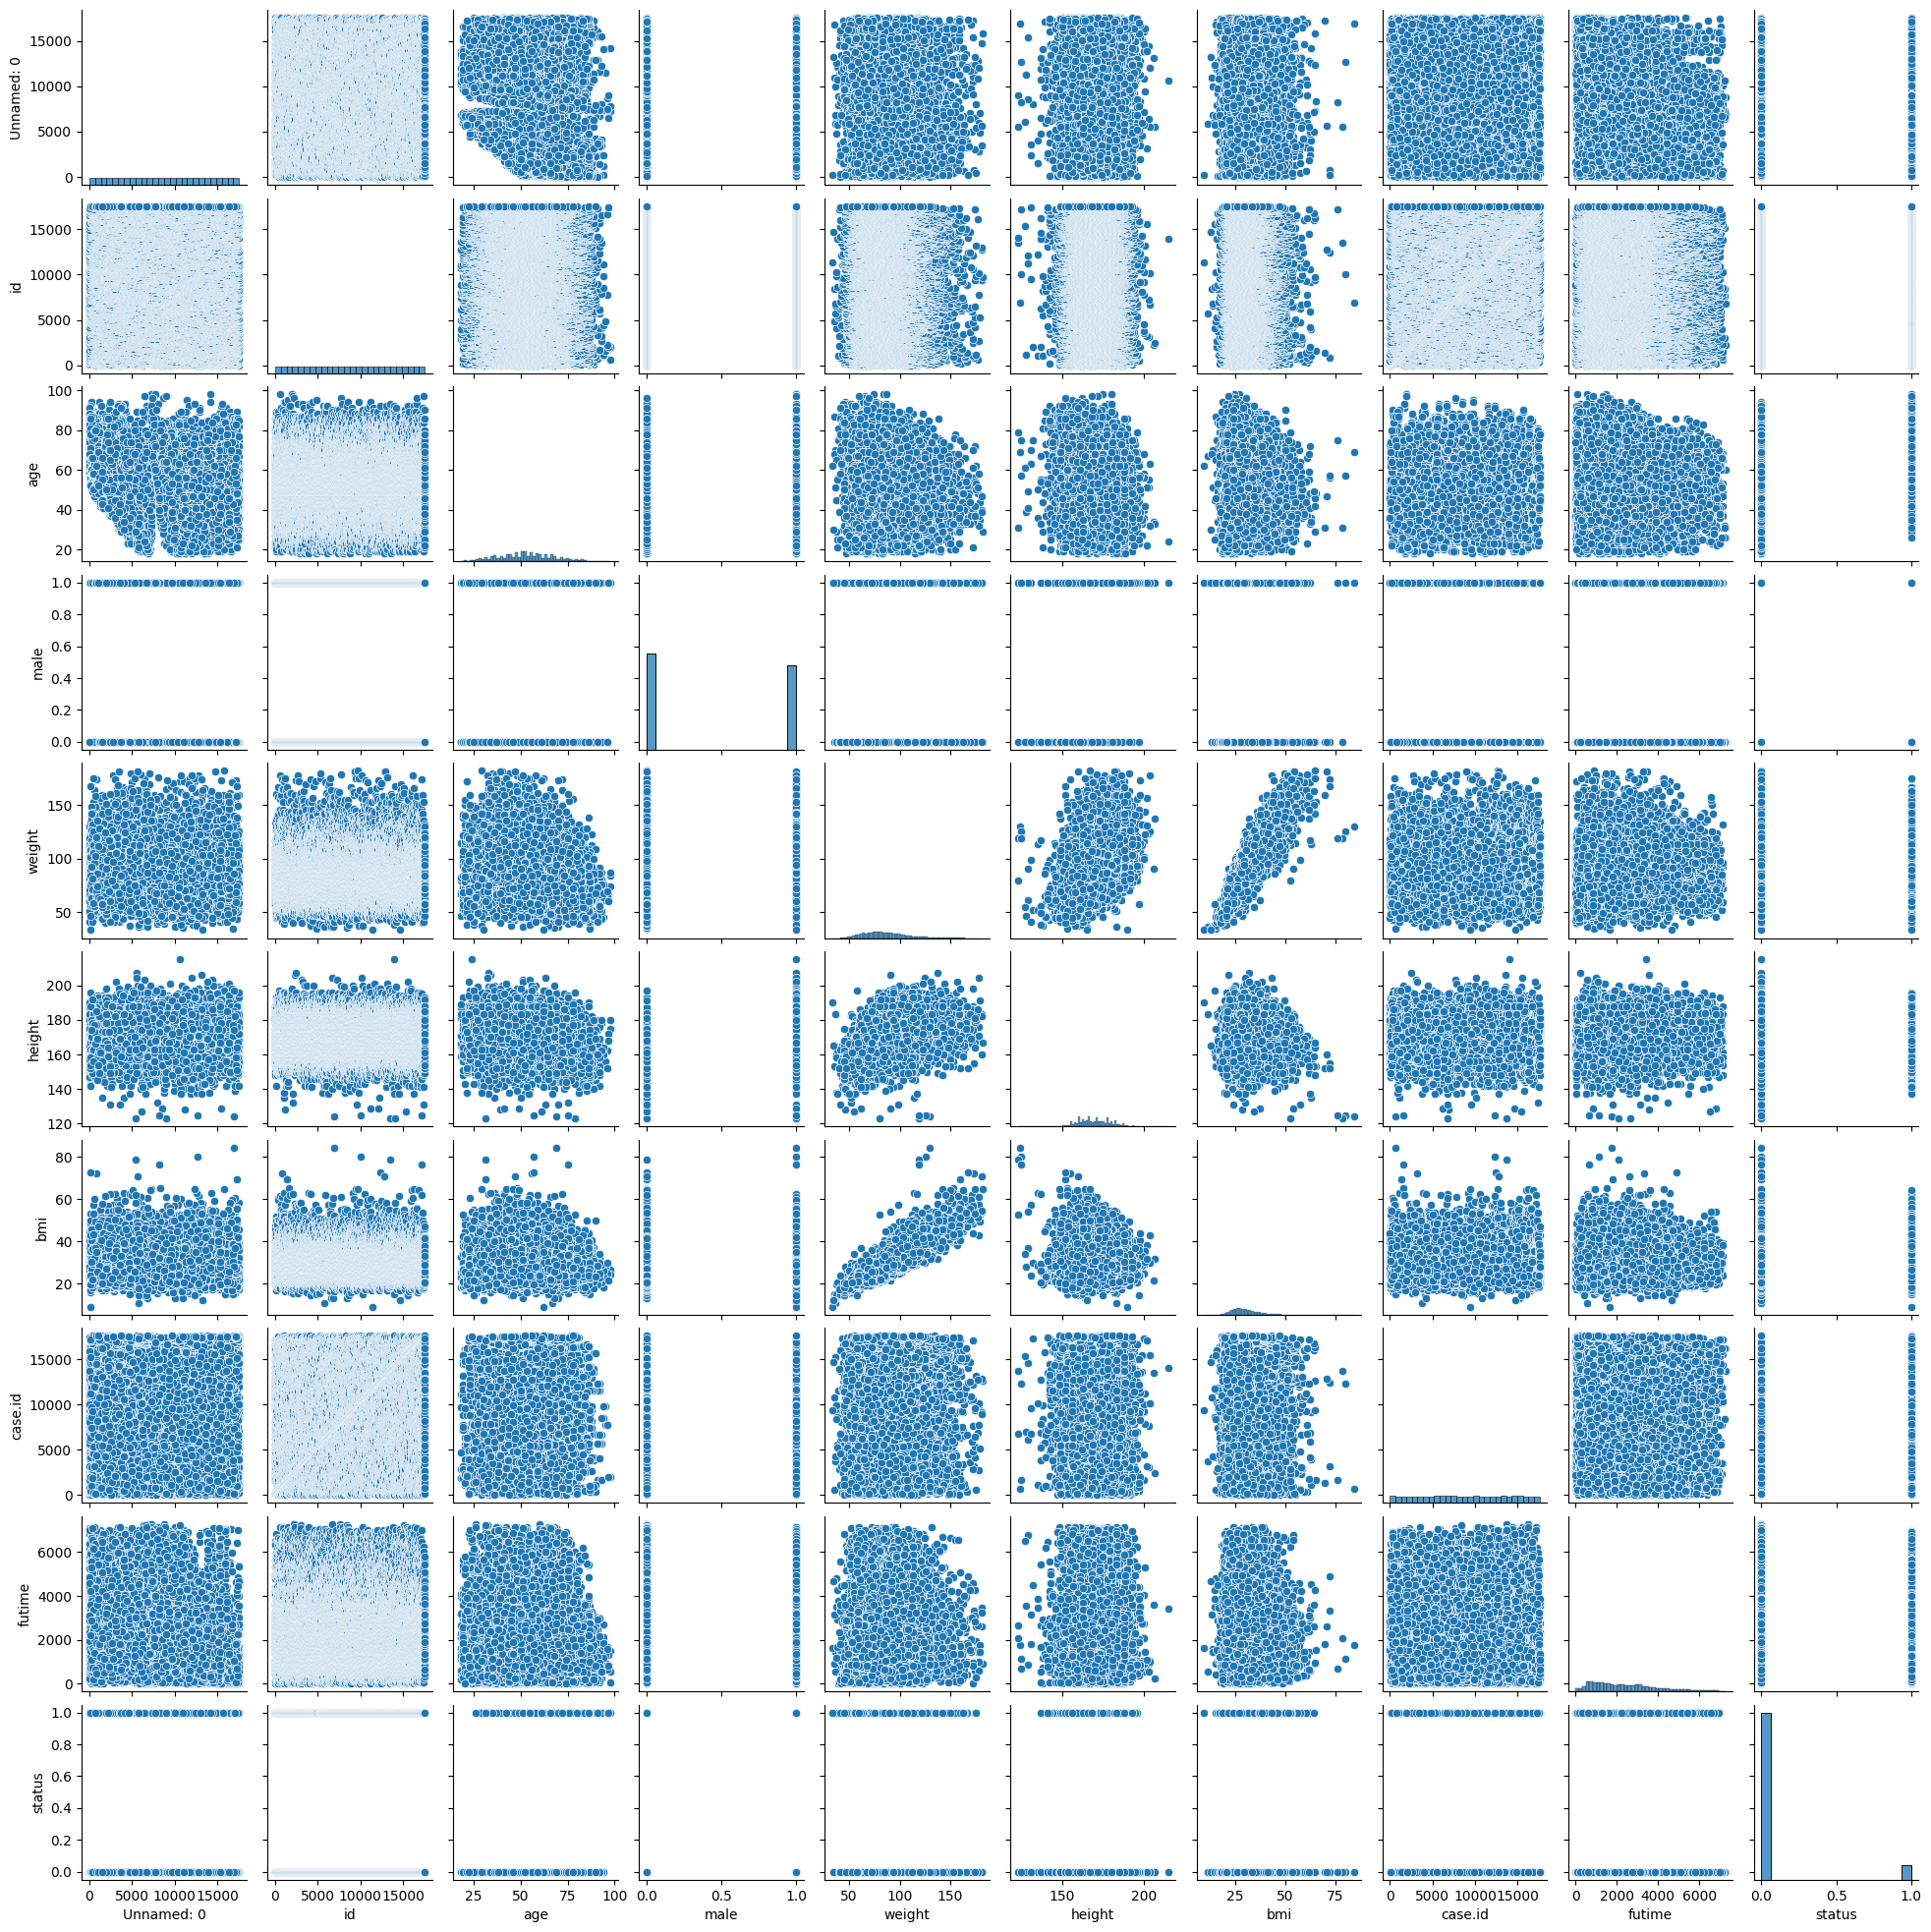

In [267]:

sns.pairplot(data = df, height = 2)

In [268]:
#number of unique values in different columns
df.nunique()

Unnamed: 0    17549
id            17549
age              81
male              2
weight         1145
height           80
bmi           11958
case.id        3853
futime         5536
status            2
dtype: int64

# Data Preprocessing

In [269]:
# Finding the number of missing values in different features of the dataset
print("Feature \t Number of missing values\n", df.isnull().sum())

Feature 	 Number of missing values
 Unnamed: 0       0
id               0
age              0
male             0
weight        4786
height        3168
bmi           4961
case.id         31
futime           0
status           0
dtype: int64


Droppong the Unnamed: 0 column as its duplicate of index.
Dropping case.id as it is id of the patient to whom the subject is matched

In [270]:
df = df.drop(['Unnamed: 0', 'case.id'], axis=1)

In [271]:
# Remove rows containing missing weight and height values
df = df.dropna(subset=['weight', 'height'])

In [272]:
# Handling missing BMI values by calculating it manually using the weight and height values
# Function to calculate BMI
def calculate_bmi(height_cm, weight_kg):
    height_m = height_cm / 100  # Convert height from cm to m
    bmi = weight_kg / (height_m ** 2)  # Calculate BMI
    return bmi

# Iterate through each row
for index, row in df.iterrows():
    height = row['height']
    weight = row['weight']
    bmi = row['bmi']
    
    # Check if BMI is missing or NaN
    if pd.isnull(bmi):
        # Calculate BMI for missing entry
        bmi = calculate_bmi(height, weight)
        
        # Update the DataFrame with the calculated BMI value
        df.at[index, 'bmi'] = bmi

In [273]:
df.isnull().sum()

id        0
age       0
male      0
weight    0
height    0
bmi       0
futime    0
status    0
dtype: int64

## Outlier Detection 

To have a closer look, checking the boxplot

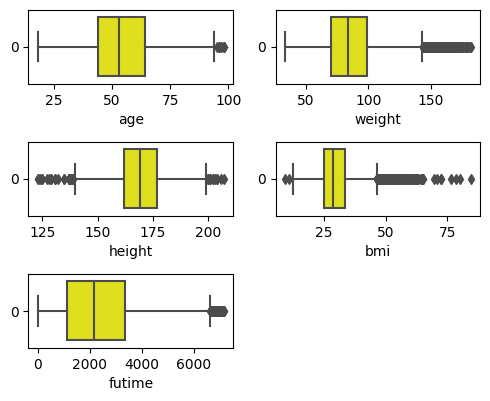

In [274]:
#outlier detection
plt.figure(figsize=(5,5),facecolor='white')
plotnumber=1
for column in df[['age','weight','height','bmi','futime']]:
    if plotnumber<=30:
        ax=plt.subplot(4,2,plotnumber)
        sns.boxplot(df[column],color='yellow',orient="h")
        plt.xlabel(column,fontsize=10)
    plotnumber+=1
plt.tight_layout()

In [275]:
# Check for outliers in the weight column
q1 = df['weight'].quantile(0.25)
q3 = df['weight'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5*iqr
upper_bound = q3 + 1.5*iqr
df = df[(df['weight'] >= lower_bound) & (df['weight'] <= upper_bound)]

# Check for outliers in the height column
q1 = df['height'].quantile(0.25)
q3 = df['height'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5*iqr
upper_bound = q3 + 1.5*iqr
df = df[(df['height'] >= lower_bound) & (df['height'] <= upper_bound)]

# Check for outliers in the bmi column
q1 = df['bmi'].quantile(0.25)
q3 = df['bmi'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5*iqr
upper_bound = q3 + 1.5*iqr
df = df[(df['bmi'] >= lower_bound) & (df['bmi'] <= upper_bound)]

# Check for outliers in the futime column
q1 = df['futime'].quantile(0.25)
q3 = df['futime'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5*iqr
upper_bound = q3 + 1.5*iqr
df = df[(df['futime'] >= lower_bound) & (df['futime'] <= upper_bound)]

# Check for outliers in the futime column
q1 = df['age'].quantile(0.25)
q3 = df['age'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5*iqr
upper_bound = q3 + 1.5*iqr
df = df[(df['age'] >= lower_bound) & (df['age'] <= upper_bound)]


# Print the new shape of the dataset
print(df.shape)

(11998, 8)


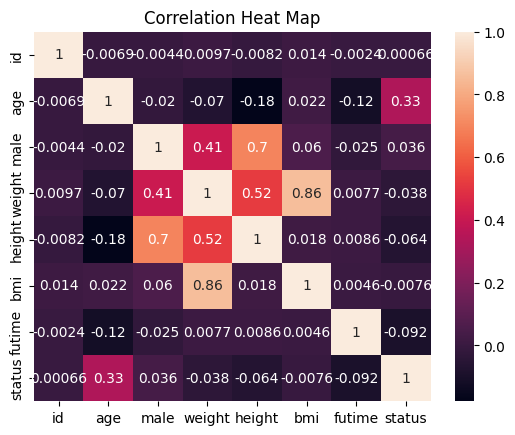

In [276]:
# Generate the correlation matrix
corr = df.corr()

# Generate the heat map
sns.heatmap(corr, annot=True)

# Set the plot title
plt.title('Correlation Heat Map')

# Display the plot
plt.show()

## Data Standardization

In [277]:
#Checking the data scales for the attributes
description = df.describe()
min_max_mean = description.loc[['min', 'max', 'mean']]
print(min_max_mean)

                id        age      male      weight      height        bmi  \
min       1.000000  18.000000  0.000000   35.100000  141.000000  13.040536   
max   17566.000000  94.000000  1.000000  143.200000  197.000000  45.843248   
mean   8773.340557  53.713119  0.446074   84.370287  169.368311  29.301466   

           futime    status  
min      7.000000  0.000000  
max   6656.000000  1.000000  
mean  2382.172945  0.079513  


In [278]:
from sklearn.preprocessing import StandardScaler
scale= StandardScaler()
 
# separate the independent and dependent variables
X = df.iloc[:,:-1]
y = df.iloc[:,-1]
 
# standardization of dependent variables
X = scale.fit_transform(X) 
print(X)

[[-1.72950209  0.22177048 -0.89738309 ... -0.64564849 -1.12690256
   2.57033749]
 [-1.72930494  0.89648451 -0.89738309 ... -0.13872566 -0.75304481
  -1.16506814]
 [-1.72910778 -0.04811513  1.11435128 ...  1.68619654  0.19639452
  -0.39704701]
 ...
 [ 1.73232512  0.15429908 -0.89738309 ... -1.05118676  0.68097354
  -1.16241751]
 [ 1.73271942 -0.52041495 -0.89738309 ... -0.84841762 -1.5002196
  -0.32349192]
 [ 1.73350804  1.03142732  1.11435128 ...  1.07788914 -0.01650437
   0.23976775]]


### Splitting the dataset

In [279]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

### Logistic Regression

In [280]:
# Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
# Make predictions with the model
logreg_predictions = logreg.predict(X_test)

y_scores = logreg.predict_proba(X_test)[:, 1]
logreg_accuracy = accuracy_score(y_test, logreg_predictions)
print("Logistic Regression Accuracy:", logreg_accuracy)
# Calculate precision and recall
precision = precision_score(y_test, logreg_predictions)
recall = recall_score(y_test, logreg_predictions)
# Calculate the AUC-ROC score
auc_roc = roc_auc_score(y_test, y_scores)


# Print the metrics
print("Precision:", precision)
print("Recall:", recall)
print("AUC-ROC Score:", auc_roc)

Logistic Regression Accuracy: 0.9308333333333333
Precision: 0.6857142857142857
Recall: 0.1340782122905028
AUC-ROC Score: 0.7951549329785014


AUC: 0.7951549329785014


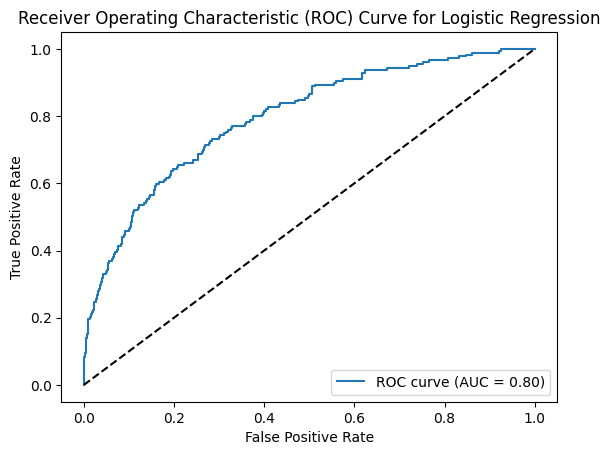

In [281]:
# Make predictions with the model
y_scores = logreg.predict_proba(X_test)[:, 1]

# Compute the false positive rate (FPR) and true positive rate (TPR)
fpr, tpr, _ = roc_curve(y_test, y_scores)

# Calculate the AUC score
auc_score = roc_auc_score(y_test, y_scores)
print("AUC:", auc_score)

# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % auc_score)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Logistic Regression')
plt.legend(loc='lower right')
plt.show()

### Random Forest

In [282]:
# Random Forest
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf_predictions = rf.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_predictions)
print("Random Forest Accuracy:", rf_accuracy)
# Calculate precision and recall
precision = precision_score(y_test, rf_predictions)
recall = recall_score(y_test, rf_predictions)
# Calculate the predicted probabilities for the positive class
rf_probabilities = rf.predict_proba(X_test)[:, 1]

# Calculate the AUC-ROC score
auc_roc = roc_auc_score(y_test, rf_probabilities)


# Print the metrics
print("Precision:", precision)
print("Recall:", recall)
print("AUC-ROC Score:", auc_roc)

Random Forest Accuracy: 0.92875
Precision: 0.5645161290322581
Recall: 0.19553072625698323
AUC-ROC Score: 0.7722740524048002


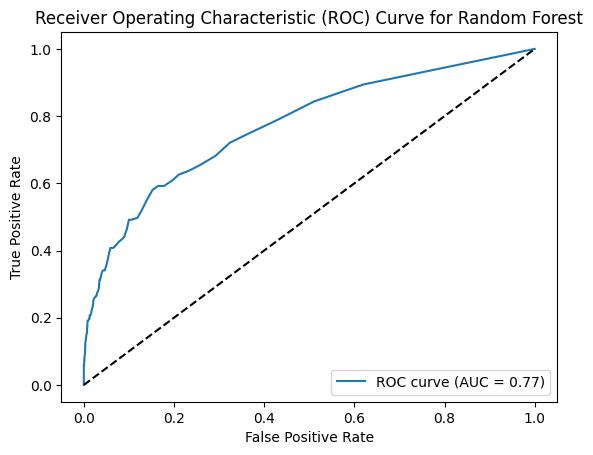

In [283]:
# Calculate the false positive rate (FPR) and true positive rate (TPR)
fpr, tpr, _ = roc_curve(y_test, rf_probabilities)
# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % auc_roc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Random Forest')
plt.legend(loc='lower right')
plt.show()



## XGBoosting

In [284]:
class XGBoosting:
  def __init__(self, booster='gbtree', objective = 'reg:linear', colsample_bytree = 0.3, learning_rate = 0.1, max_depth = 5, n_estimators = 10):
    self.booster = booster
    self.objective= objective
    self.colsample_bytree = colsample_bytree
    self.learning_rate = learning_rate
    self.max_depth = max_depth
    self.n_estimators = n_estimators
  
  def fit(self, X_train, y_train):
    self.model = xgb.XGBRegressor(booster=self.booster, objective =self.objective,
                              colsample_bytree = self.colsample_bytree, learning_rate = self.learning_rate,
                              max_depth = self.max_depth, n_estimators = self.n_estimators) 
    self.model.fit(X_train, y_train) 
    return self.model
  def predict(self, X_test):
    pred = self.model.predict(X_test) 
    return pred

  def MAE(self, X_test, y_test):
    pred = self.model.predict(X_test)
    self.errors = abs(pred - y_test)
    self.average_error = round(np.mean(self.errors), 2)
    return self.average_error
    
  def MSE(self, X_test, y_test):
    pred = self.model.predict(X_test)
    self.errors = mean_squared_error(y_test, pred)
    self.average_error = round(np.mean(self.errors), 2)
    return self.average_error

  def R2Score(self, X_test, y_test):
    pred = self.model.predict(X_test)
    self.errors = r2_score(y_test, pred)
    self.average_error = round(np.mean(self.errors), 2)
    return self.average_error

In [285]:
xgboosting = XGBoosting()
xgboosting.fit(X_train, y_train)


[05:09:55] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=None, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.3, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=10, n_jobs=None, num_parallel_tree=None,
             objective='reg:linear', predictor=None, ...)

In [286]:
print('Mean Absolute Error:', xgboosting.MAE(X_test, y_test), 'degrees.')
print('Mean Square Error:', xgboosting.MSE(X_test, y_test), 'degrees.')
print('R2 Score:', xgboosting.R2Score(X_test, y_test), 'degrees.')

Mean Absolute Error: 0.26 degrees.
Mean Square Error: 0.09 degrees.
R2 Score: -0.28 degrees.


xgBoost Accuracy: 0.9254166666666667
Precision: 0.9254
Recall: 0.9254
AUC-ROC Score: 0.7503


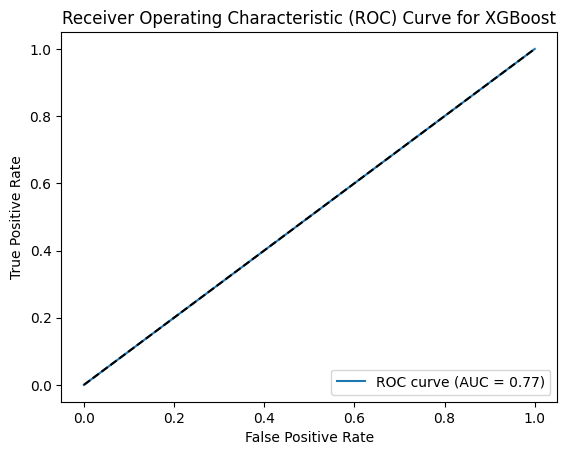

In [287]:
# extract the predicted probabilities
p_pred = xgboosting.predict(X_test)
p_pred = p_pred.flatten()
y_pred = np.where(p_pred > 0.5, 1, 0)
xg_accuracy = accuracy_score(y_test, y_pred)


precision = precision_score(y_test, y_pred,average='micro')
recall = recall_score(y_test, y_pred,average='micro')

auc= roc_auc_score(y_test, p_pred)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
print("xgBoost Accuracy:", xg_accuracy)
print("Precision: {:.4f}".format(precision))
print("Recall: {:.4f}".format(recall))
print("AUC-ROC Score: {:.4f}".format(auc))
# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % auc_roc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for XGBoost')
plt.legend(loc='lower right')
plt.show()


### Logistic Regression with Hyperparameter tuning

In [288]:
# Define the hyperparameter grid to search over
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # Inverse of regularization strength
    'penalty': ['l1', 'l2'],  # Regularization penalty type
    'solver': ['liblinear', 'saga']  # Algorithm to use for optimization
}
# Create and train the Logistic Regression model
logreg = LogisticRegression()
grid_search = GridSearchCV(logreg, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print the best hyperparameter values found
print("Best Hyperparameters:", grid_search.best_params_)

# Get the best model
best_logreg = grid_search.best_estimator_

# Make predictions with the best model
best_logreg_predictions = best_logreg.predict(X_test)
best_logreg_accuracy = accuracy_score(y_test, best_logreg_predictions)
print("Best Logistic Regression Accuracy:", best_logreg_accuracy)
# Calculate precision and recall
precision = precision_score(y_test, best_logreg_predictions)
recall = recall_score(y_test, best_logreg_predictions)
# Make predictions with the model
y_scores = best_logreg.predict_proba(X_test)[:, 1]
# Calculate the AUC-ROC score
auc_roc = roc_auc_score(y_test, y_scores)


# Print the metrics
print("Precision:", precision)
print("Recall:", recall)
print("AUC-ROC Score:", auc_roc)

Best Hyperparameters: {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}
Best Logistic Regression Accuracy: 0.9304166666666667
Precision: 0.6875
Recall: 0.12290502793296089
AUC-ROC Score: 0.7960856124499759


AUC: 0.7960856124499759


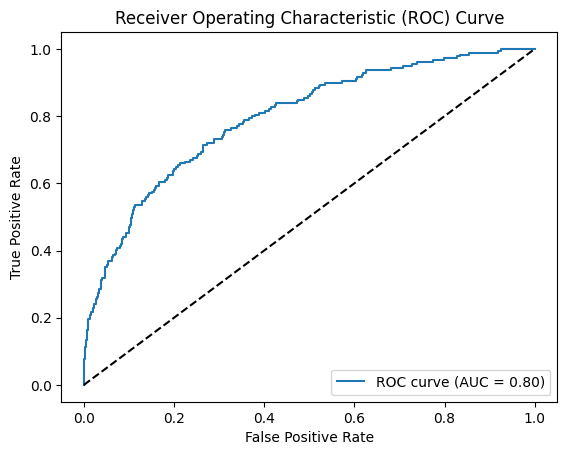

In [289]:


# Compute the false positive rate (FPR) and true positive rate (TPR)
fpr, tpr, _ = roc_curve(y_test, y_scores)

# Calculate the AUC score
auc_score = roc_auc_score(y_test, y_scores)
print("AUC:", auc_score)

# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % auc_score)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

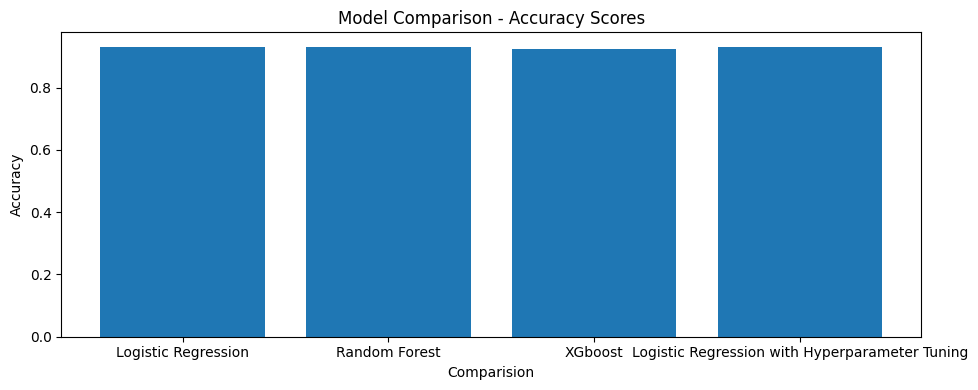

In [290]:

# Accuracy scores of each model
models = [ 'Logistic Regression', 'Random Forest', 'XGboost', 'Logistic Regression with Hyperparameter Tuning' ]
accuracy_scores = [logreg_accuracy, rf_accuracy, xg_accuracy,best_logreg_accuracy]

# Plotting the model comparison accuracy graph
plt.figure(figsize=(10, 4))
plt.bar(models, accuracy_scores)

plt.xlabel('Comparision')
plt.ylabel('Accuracy')
plt.title('Model Comparison - Accuracy Scores')


plt.tight_layout()
plt.show()

Confusion Matrix to visualize the count of predicted vs actual values

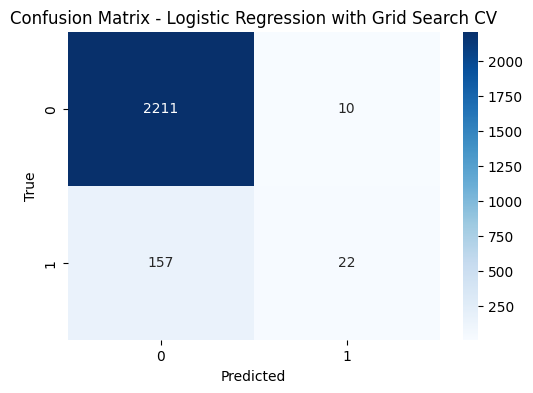

In [291]:
# Scatter plot
# Obtain the predicted probabilities or class labels
from sklearn.metrics import confusion_matrix
# Create a confusion matrix
cm = confusion_matrix(y_test, best_logreg_predictions)

# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Logistic Regression with Grid Search CV')
plt.show()